# Generate a global grid for visualizing the PINN results

After training the PINN, the neural network can calculate the dust flux deposition on any location on earth. For visualization purposes, let us generate a global grid with 3 degrees spacing in both latitude and longitude to visualize the PINN results.

## Preliminaries

Import the necessary libraries and specify the data folders.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize' : 20,
          'lines.linewidth' : 20,
          'legend.fontsize': 20,
          'font.family':'DeJavu Serif',
          'font.serif' :'Times New Roman'}

plt.rcParams.update(params)

In [67]:
FIGURE_PATH = "C:/Users/vitas/Desktop/LE PINN/pinn.global.dust/pinn.global.dust/Code/figures/"
DATA_PATH = "C:/Users/vitas/Desktop/LE PINN/pinn.global.dust/pinn.global.dust/Data/"
DATA_LOAD_PATH = DATA_PATH + "original_data/"
DATA_SAVE_PATH = DATA_PATH + "processed_data/"

In [68]:
path_to_shapefile ="C:/Users/vitas/Desktop/LE PINN/pinn.global.dust/pinn.global.dust/ne_110m_admin_0_countries.shp"
world = gpd.read_file(path_to_shapefile)
print(world.head())


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

## Create and visualize the global grid

The global grid for the predictions consists of 3-degree spacing.

In [69]:
longitude_to_predict = np.linspace(-180., 180., 120)
latitude_to_predict = np.linspace(-90., 90., 60)


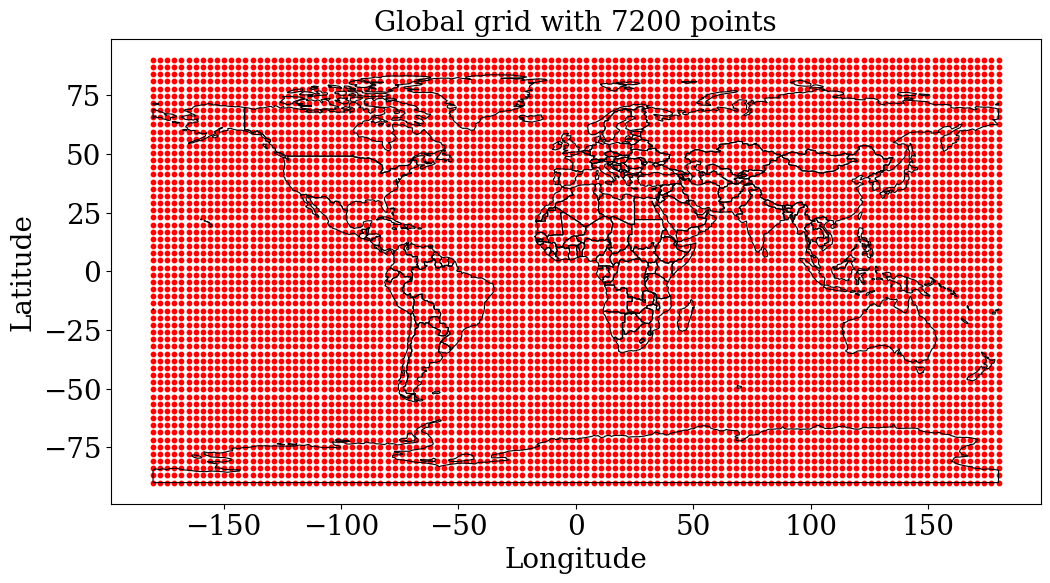

In [71]:
# Creare la griglia (per esempio, longitudes e latitudes)
xx, yy = np.meshgrid(longitude_to_predict, latitude_to_predict)
XYpairs = np.vstack([xx.reshape(-1), yy.reshape(-1)])

# Creare un GeoDataFrame per i punti
df_dust_geopandas_test = gpd.GeoDataFrame(geometry=gpd.points_from_xy(XYpairs[0], XYpairs[1]))

# Caricare il dataset dei continenti
world = gpd.read_file(path_to_shapefile)

# Creare la figura per la mappa
fig, ax = plt.subplots(figsize=(12, 10))

# Tracciare solo i confini globali senza dissoluzione
world.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Tracciare i punti del GeoDataFrame
df_dust_geopandas_test.plot(ax=ax, color='red', markersize=10, marker='o')

# Impostare le etichette e il titolo
ax.set(xlabel='Longitude', ylabel='Latitude', title=f'Global grid with {df_dust_geopandas_test.shape[0]} points')

# Visualizzare la mappa
plt.show()


## Export the processed data

In [72]:
df = pd.DataFrame({
    'lon': df_dust_geopandas_test.geometry.x,
    'lat': df_dust_geopandas_test.geometry.y
})

In [73]:
with open(DATA_SAVE_PATH + "df_global_grid.csv", 'w') as f:
    df.to_csv(f, index = False)